## Libraries

In [57]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import scipy

import matplotlib.pyplot  as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from datetime import datetime

# for feature selection
import scipy.io
from FSelection.skfeature.function.sparse_learning_based import MCFS
from FSelection.skfeature.utility import construct_W
from FSelection.skfeature.utility import unsupervised_evaluation

# laplacian FS
from sklearn.neighbors import kneighbors_graph


# for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from kmodes.kmodes import KModes

# for feature extraction
from sklearn.decomposition import PCA

# for cluster evaluation
from scipy.cluster.hierarchy import dendrogram, linkage

## Import Data

In [2]:
csv_file = '2021-07-07 Financial servcies dataset - Anon - Static for clustering.xlsx'
# with open(csv_file) as f:
#     print(f)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/dataset/'+csv_file)

In [4]:
df = pd.read_excel('dataset/'+csv_file)

In [5]:
df_buffer = df.copy() 

In [6]:
df = df_buffer

In [7]:
df.head(5)

,ID,CREATED_ON,LAST_LOGIN,SECONDARY_ID,ORG_NAME,SERVICE_X_DATE,POSTCODE,LINE_OF_BUSINESS,SIZE_CODE,PACKAGE_TYPE,...,SERVICE_3_COUNT,SUPERUSER_ID,SUPERUSER_LAST_LOGIN,ACCOUNTANT_ID,ACCOUNTANT_LAST_LOGIN,GROSS_INCOME,STATUS_CODE,RATING_CODE,INCOME_RANGE_CODE,RISK_CATEGORY
0,233823894,2017-03-22 14:30:00,2017-03-22 14:30:54,20441.00,Company 1,NaT,1191.00,49414.00,91406695.00,Free_tier_0,...,0.00,233823893.00,2018-01-15 06:49:25,NaN,NaT,91107.00,91406700.00,4.00,NaN,NaN
1,233823896,2017-03-23 12:48:00,2017-03-23 12:48:31,20443.00,Company 2,NaT,1117.00,NaN,91406690.00,Free_tier_0,...,0.00,233823895.00,2019-01-07 09:52:02,NaN,NaT,2129059.00,91406700.00,1.00,NaN,NaN
2,233823898,2017-03-23 13:46:00,2017-03-23 15:19:06,20445.00,Company 3,NaT,1123.00,70224.00,91406692.00,Free_tier_0,...,0.00,233823897.00,2018-01-15 06:49:26,NaN,NaT,39062.00,91406700.00,2.00,NaN,NaN
3,233823900,2017-03-27 06:40:00,2017-03-27 06:44:06,20447.00,Company 4,NaT,2600.00,81104.00,91406694.00,Free_tier_0,...,0.00,233823899.00,2018-01-15 06:49:26,NaN,NaT,60177.00,91406700.00,1.00,NaN,NaN
4,233823901,2017-03-27 06:43:00,2017-03-27 06:46:13,20448.00,Company 5,NaT,1016.00,46514.00,91406695.00,Free_tier_0,...,0.00,NaN,NaT,NaN,NaT,NaN,91406713.00,NaN,NaN,NaN


## Explore Data

In [8]:
df.describe()

,ID,SECONDARY_ID,POSTCODE,LINE_OF_BUSINESS,SIZE_CODE,SERVICE_1_COUNT,SERVICE_2_COUNT,SERVICE_2_TOTAL,SERVICE_3_COUNT,SUPERUSER_ID,ACCOUNTANT_ID,GROSS_INCOME,STATUS_CODE,RATING_CODE,INCOME_RANGE_CODE,RISK_CATEGORY
count,27597.00,27589.00,21588.00,20734.00,21588.00,27517.00,27517.00,27517.00,27517.00,16886.00,1237.00,19203.00,21593.00,20761.00,437.00,4329.00
mean,447640790.22,79318.25,4179.89,55281.34,91406691.67,16.54,1.09,34.16,16.09,442745552.90,443767477.08,567563.60,91406700.27,2.16,1.17,4.28
std,123947970.83,19413.90,2893.96,18696.54,5.15,208.38,41.46,373.56,168.08,117966179.54,154532772.15,7618814.03,1.64,0.93,0.57,2.41
min,233823834.00,1000.00,1007.00,10114.00,91406682.00,0.00,0.00,0.00,0.00,233823835.00,233824057.00,-347.00,91406700.00,1.00,0.00,1.00
25%,391186706.00,65607.00,1196.00,43344.00,91406692.00,0.00,0.00,0.00,0.00,398215322.00,334245725.00,15512.50,91406700.00,1.00,1.00,2.00
50%,440576754.00,80256.00,3200.00,49414.00,91406694.00,0.00,0.00,0.00,0.00,438175665.00,411071952.00,66405.00,91406700.00,2.00,1.00,4.00
75%,496089121.00,94953.00,6924.25,69204.00,91406695.00,0.00,0.00,0.00,0.00,469360589.25,580236079.00,244362.00,91406700.00,3.00,1.00,6.00
max,786785895.00,111086.00,9970.00,99004.00,91406699.00,10865.00,5275.00,49968.00,8294.00,786770578.00,786785890.00,523079392.00,91406715.00,4.00,5.00,9.00


In [9]:
# null values
null_values = df.isnull().sum()
df_nulls = pd.DataFrame({'Column':null_values.index, 'Nulls':null_values.values})
# Count non empty cells
df_count = df_nulls
df_count = df_count.rename(columns={"Nulls": "Count"})
df_count.iloc[:,1] = 27597 - df_count.iloc[:,1]
# count unique cells
uniqueValues = df.nunique()
df_unique = pd.DataFrame({'Column':uniqueValues.index, 'Unique':uniqueValues.values})

In [10]:
# merge all together in one dataframe
analyzed_df = pd.concat([df_nulls.iloc[:,0], df_count.iloc[:,1], df_nulls.iloc[:,1], df_unique.iloc[:,1]], axis = 1)
print(analyzed_df)

                   Column  Count  Nulls  Unique
0                      ID  27597      0   27503
1              CREATED_ON  27597      0   25280
2              LAST_LOGIN  27361    236   27213
3            SECONDARY_ID  27589      8   27495
4                ORG_NAME  27597      0   27597
5          SERVICE_X_DATE   7335  20262    7242
6                POSTCODE  21588   6009    1977
7        LINE_OF_BUSINESS  20734   6863     474
8               SIZE_CODE  21588   6009      18
9            PACKAGE_TYPE  27492    105      10
10  PREVIOUS_PACKAGE_TYPE  26371   1226      13
11    PACKAGE_CHANGE_DATE  26371   1226     205
12        SERVICE_1_COUNT  27517     80     460
13        SERVICE_2_COUNT  27517     80      93
14        SERVICE_2_TOTAL  27517     80     769
15        SERVICE_3_COUNT  27517     80     505
16           SUPERUSER_ID  16886  10711   16808
17   SUPERUSER_LAST_LOGIN  16886  10711   16601
18          ACCOUNTANT_ID   1237  26360    1235
19  ACCOUNTANT_LAST_LOGIN   1237  26360 

In [11]:
## SECONDARY_ID

# n = len(pd.unique(df['INCOME_RANGE_CODE']))

n1 = len(pd.unique( df. iloc[:, 3] )) #count unique cells
# n2 = df. iloc[:, 3].isna().sum() #count empty cells
# n3 = df.groupby(['SECONDARY_ID']).size().reset_index(name='count')
# n30 = n3[(n3['count'] == 1)]['count'].sum()
# n31 = n3['count'].sum()
# n32 = n3[(n3['count'] > 1)]['count'].sum()
# n33 = n3[(n3['count'] > 1)]['count'].count()

dup_cells = df.duplicated(subset='SECONDARY_ID', keep='first').sum()

print("number of unique cells:", n1)
# print("number of distinct cells:", n30)
# print("number of empty cells:", n2)
# print("-------")
# print("sum of all cells excluding empty: (27597-8) = ", n31)
# print("sum of duplicates:", n32)
# print("number of duplicate cells (the cell itself and the other duplicating from it):", n33)
print("number of duplicate cells (only the duplicates but not the original cell):", dup_cells)

print("-------\nTotal= unique + duplicates = ", n1 + dup_cells)

number of unique cells: 27496
number of duplicate cells (only the duplicates but not the original cell): 101
-------
Total= unique + duplicates =  27597


In [12]:
id = df['ID'].nunique(dropna=False) #count unique cells including NaN
dup_cells_id = df.duplicated(subset='ID', keep='first').sum()

print(id)
print(dup_cells_id)

27503
94


## Correlation Estimate

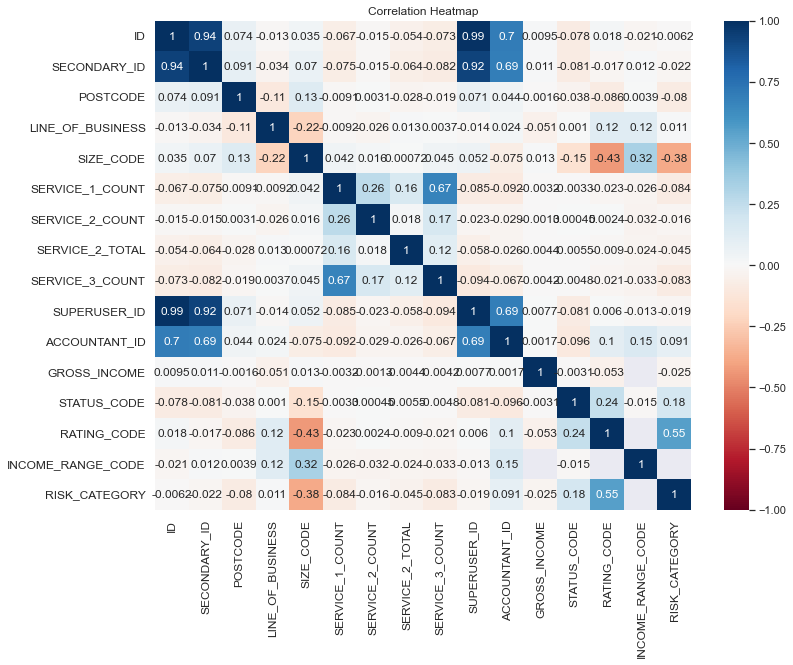

In [13]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

## Data Engineering (Feature Extraction)

In [14]:
df_1 = df.copy()

**customer age** column: new, midterm, stable

In [15]:
# customer_age_date_diff = created_on - last_login (months)
# suctomer_age: 
# - new		(< 3 month)
# - midterm	(> 3 month, <12 month)
# - stable	(> 12 month)

# last_login conatains 236  values, better dropping rows of these cells
## Rows drop
df_1.dropna(subset=['LAST_LOGIN'], inplace=True)
df_1.reset_index(drop=True, inplace=True)

# df_1['customer_age_date_diff'] = (df_1['LAST_LOGIN'] - df_1['CREATED_ON']).dt.days  ## return difference in days
df_1['customer_age_date_diff'] = ((df_1['LAST_LOGIN'] - df_1['CREATED_ON'])/np.timedelta64(1, 'M'))
df_1['customer_age_date_diff'] = round(df_1['customer_age_date_diff']).astype(int)

In [16]:
print(df_1['customer_age_date_diff'].iloc[4:8])

4     0
5    19
6    43
7    26
Name: customer_age_date_diff, dtype: int32


In [17]:
# create a list of our conditions
age_conditions = [
    (df_1['customer_age_date_diff'] <= 3),
    (df_1['customer_age_date_diff'] > 3) & (df_1['customer_age_date_diff'] < 9),
    (df_1['customer_age_date_diff'] >= 9)
    ]

# create a list of the values we want to assign for each condition
age_values = ['new', 'midterm', 'satble']

# create a new column and use np.select to assign values to it using our lists as arguments
df_1['customer_age'] = np.select(age_conditions, age_values)

# display updated DataFrame
df_1['customer_age'].iloc[4:8]

4       new
5    satble
6    satble
7    satble
Name: customer_age, dtype: object

**Active** column: active, inactive

In [18]:
data_collected_date_str = '07/07/21 00:00:00'

data_collected_date = datetime.strptime(data_collected_date_str, '%d/%m/%y %H:%M:%S')

print(data_collected_date)

2021-07-07 00:00:00


In [19]:
# active:
# - 1		(2021-07-07 - last login <= 2 months) ->active 
# - 0		(2021-07-07 - last login > 2 months) -> inactive 

df_1['since_last_login_date_diff'] = ((data_collected_date - df_1['LAST_LOGIN'])/np.timedelta64(1, 'M'))
df_1['since_last_login_date_diff'] = round(df_1['since_last_login_date_diff']).astype(int)

In [20]:
df_1['active'] = np.where(df_1['since_last_login_date_diff'] <= 2, 1, 0)

In [21]:
nb_active_cust= df_1[df_1['active'] == 1]['active'].count()
nb_inactive_cust= df_1[df_1['active'] == 0]['active'].count()
print(nb_active_cust)
print('The % of active customers is:', "{:.2f}".format(nb_active_cust/(nb_active_cust+nb_inactive_cust)*100)) 

7868
The % of active customers is: 28.76


## Processing Data: Keeping active customers only

correlation **before** removeing inactive subscribers

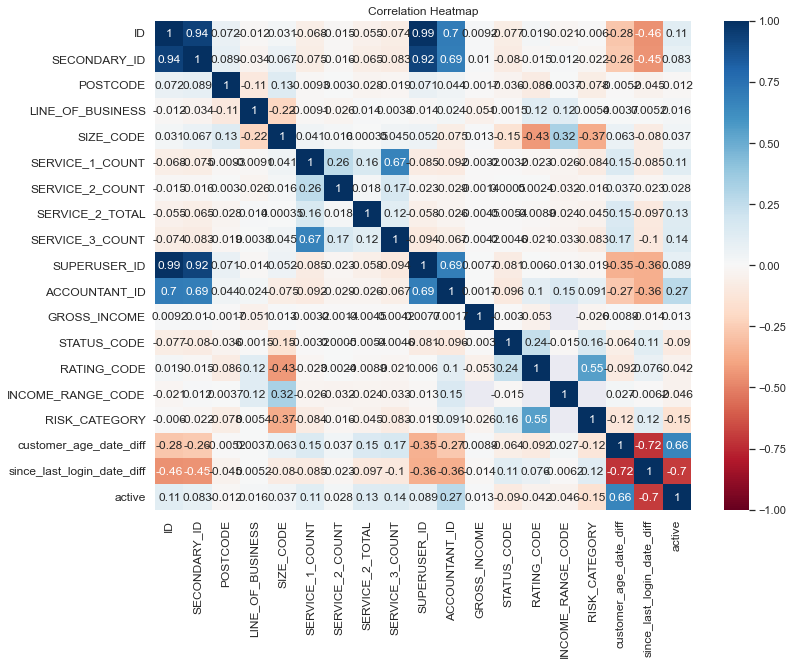

In [22]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_1.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
df_2 = df_1.copy()

correlation **after** removeing inactive subscribers

In [24]:
# df_2 = df_2[df_2['active'] == 1]
df_2 = df_2.loc[df_2['active'] == 1]
df_2 = df_2.reset_index()
df_2

,index,ID,CREATED_ON,LAST_LOGIN,SECONDARY_ID,ORG_NAME,SERVICE_X_DATE,POSTCODE,LINE_OF_BUSINESS,SIZE_CODE,...,ACCOUNTANT_LAST_LOGIN,GROSS_INCOME,STATUS_CODE,RATING_CODE,INCOME_RANGE_CODE,RISK_CATEGORY,customer_age_date_diff,customer_age,since_last_login_date_diff,active
0,15,233832692,2017-06-20 09:11:00,2021-07-06 18:53:18,31265.00,Company 16,2017-08-11 04:32:46,1037.00,70224.00,91406693.00,...,NaT,14147.00,91406700.00,3.00,NaN,4.00,49,satble,0,1
1,16,233832694,2017-06-20 11:01:00,2021-07-06 08:03:23,31267.00,Company 17,2017-06-30 14:24:50,1016.00,18134.00,91406696.00,...,NaT,122126.00,91406700.00,1.00,NaN,3.00,49,satble,0,1
2,22,233834757,2017-06-21 15:18:00,2021-06-09 08:40:37,31283.00,Company 23,2017-06-21 15:20:44,3780.00,70224.00,91406683.00,...,NaT,1260.00,91406700.00,4.00,NaN,9.00,48,satble,1,1
3,32,234529195,2017-06-23 21:09:00,2021-05-13 07:24:11,31300.00,Company 33,2017-07-14 07:57:35,1111.00,70224.00,91406692.00,...,2021-04-16 15:14:15,1127.00,91406700.00,3.00,NaN,3.00,47,satble,2,1
4,36,234623830,2017-06-25 18:05:00,2021-07-01 18:26:00,31314.00,Company 37,2017-08-16 08:12:52,5100.00,46904.00,91406683.00,...,NaT,28900.00,91406700.00,1.00,NaN,2.00,48,satble,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7863,27356,786770573,2021-07-05 14:17:00,2021-07-05 14:17:43,111062.00,Company 27593,NaT,7030.00,47644.00,91406692.00,...,NaT,12545.00,91406700.00,3.00,NaN,NaN,0,new,0,1
7864,27357,786770575,2021-07-05 17:23:00,2021-07-05 17:23:22,111064.00,Company 27594,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,0,new,0,1
7865,27358,786770577,2021-07-05 18:45:00,2021-07-05 18:47:10,111066.00,Company 27595,NaT,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,0,new,0,1
7866,27359,786770579,2021-07-05 20:29:00,2021-07-05 20:34:33,111068.00,Company 27596,2021-07-05 20:34:30,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,0,new,0,1


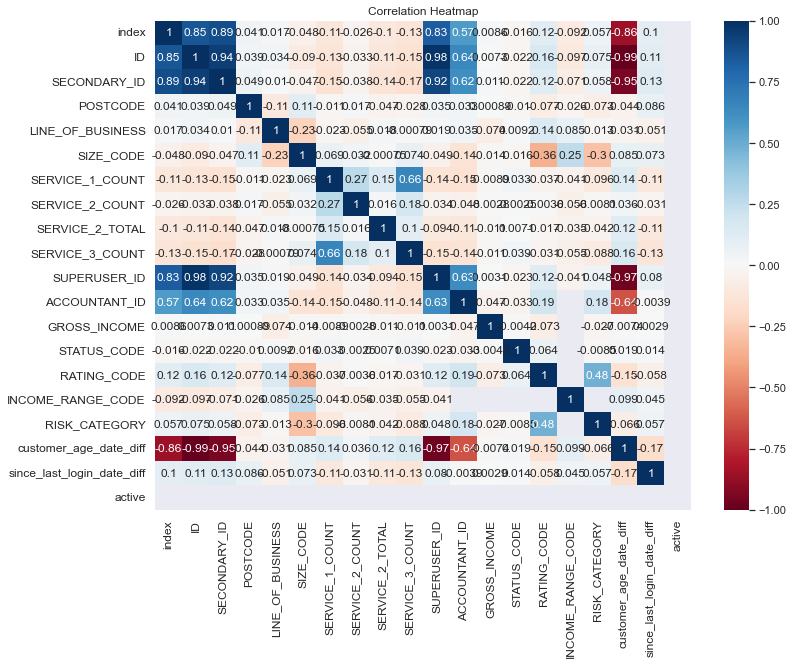

In [25]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_2.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

## Data Cleaning

**rechecking null valuse count after taking only active customers**

In [26]:
# null values
null_values = df_2.isnull().sum()
df_nulls = pd.DataFrame({'Column':null_values.index, 'Nulls':null_values.values})

# Count non empty cells
df_count = df_nulls
df_count = df_count.rename(columns={"Nulls": "Count"})
df_count.iloc[:,1] = 7868 - df_count.iloc[:,1]

# count unique cells
uniqueValues = df_2.nunique()
df_unique = pd.DataFrame({'Column':uniqueValues.index, 'Unique':uniqueValues.values})


In [27]:
# calculate null %
df_nulls_percentage= (df_nulls.iloc[:,1]/7868)*100
df_nulls_percentage = pd.DataFrame({'Column':df_nulls_percentage.index, 'Nulls %':df_nulls_percentage.values})

In [28]:
# merge all together in one dataframe
analyzed_df = pd.concat([df_nulls.iloc[:,0], df_count.iloc[:,1], df_nulls.iloc[:,1], df_nulls_percentage.iloc[:,1],df_unique.iloc[:,1]], axis = 1)
print(analyzed_df)

                        Column  Count  Nulls  Nulls %  Unique
0                        index   7868      0     0.00    7868
1                           ID   7868      0     0.00    7789
2                   CREATED_ON   7868      0     0.00    7591
3                   LAST_LOGIN   7868      0     0.00    7745
4                 SECONDARY_ID   7868      0     0.00    7789
5                     ORG_NAME   7868      0     0.00    7868
6               SERVICE_X_DATE   3553   4315    54.84    3476
7                     POSTCODE   6189   1679    21.34    1246
8             LINE_OF_BUSINESS   5890   1978    25.14     381
9                    SIZE_CODE   6189   1679    21.34      17
10                PACKAGE_TYPE   7866      2     0.03      10
11       PREVIOUS_PACKAGE_TYPE   7414    454     5.77      13
12         PACKAGE_CHANGE_DATE   7414    454     5.77     186
13             SERVICE_1_COUNT   7866      2     0.03     424
14             SERVICE_2_COUNT   7866      2     0.03      80
15      

**Will drop high null values now**

In [29]:
feature_max_null = 75 # 75% of the column is null to be dropped
feat_null_exc = list(analyzed_df[analyzed_df['Nulls %'] > feature_max_null]['Column'])
print(feat_null_exc)

['ACCOUNTANT_ID', 'ACCOUNTANT_LAST_LOGIN', 'INCOME_RANGE_CODE', 'RISK_CATEGORY']


In [30]:
# drop the columns with high null values
df_2.drop(feat_null_exc, axis=1, inplace=True)

**Remove all ids**

In [31]:
df_2.drop(['ID', 'SECONDARY_ID', 'SUPERUSER_ID'], axis=1, inplace=True)
# ACCOUNTANT_ID

**remove unnecessary columns from F.Engineering**

In [32]:
df_2.drop(['customer_age_date_diff', 'since_last_login_date_diff', 'active'], axis=1, inplace=True)

**remove all date columns**

In [33]:
df_2.drop(['CREATED_ON', 'LAST_LOGIN', 'SERVICE_X_DATE', 'PACKAGE_CHANGE_DATE', 'SUPERUSER_LAST_LOGIN'], axis=1, inplace=True)
# ACCOUNTANT_LAST_LOGIN

**drop columns that are very unique and will add no info for clustering**

In [34]:
df_2.drop(['ORG_NAME'], axis=1, inplace=True)

**filling missing data**

In [35]:
# POSTCODE
df_2['POSTCODE'].fillna(df_2['POSTCODE'].mode()[0], inplace = True)

# LINE_OF_BUSINESS
df_2['LINE_OF_BUSINESS'].fillna(df_2['LINE_OF_BUSINESS'].mode()[0], inplace = True)

# SIZE_CODE
df_2['SIZE_CODE'].fillna(df_2['SIZE_CODE'].mode()[0], inplace = True)

In [36]:
df_2['PACKAGE_TYPE'].fillna(df_2['PACKAGE_TYPE'].mode()[0], inplace = True)
df_2['PREVIOUS_PACKAGE_TYPE'].fillna(df_2['PREVIOUS_PACKAGE_TYPE'].mode()[0], inplace = True)

In [37]:
df_2['SERVICE_1_COUNT'].fillna((df_2['SERVICE_1_COUNT'].mean()), inplace=True)
df_2['SERVICE_2_COUNT'].fillna((df_2['SERVICE_2_COUNT'].mean()), inplace=True)
df_2['SERVICE_2_TOTAL'].fillna((df_2['SERVICE_2_TOTAL'].mean()), inplace=True)
df_2['SERVICE_3_COUNT'].fillna((df_2['SERVICE_3_COUNT'].mean()), inplace=True)

In [38]:
# GROSS_INCOME
df_2['GROSS_INCOME'].fillna(df_2['GROSS_INCOME'].mode()[0], inplace = True)
# STATUS_CODE
df_2['STATUS_CODE'].fillna(df_2['STATUS_CODE'].mode()[0], inplace = True)
# RATING_CODE
df_2['RATING_CODE'].fillna((round(df_2['RATING_CODE'].mean())), inplace=True)

In [39]:
print(df_2.count())

index                    7868
POSTCODE                 7868
LINE_OF_BUSINESS         7868
SIZE_CODE                7868
PACKAGE_TYPE             7868
PREVIOUS_PACKAGE_TYPE    7868
SERVICE_1_COUNT          7868
SERVICE_2_COUNT          7868
SERVICE_2_TOTAL          7868
SERVICE_3_COUNT          7868
GROSS_INCOME             7868
STATUS_CODE              7868
RATING_CODE              7868
customer_age             7868
dtype: int64


In [40]:
# bringing the Categorical attributes names
# ====================================================
df_2_categorical_fields = df_2.select_dtypes(include=['object']).columns
df_2_categorical_fields

Index(['PACKAGE_TYPE', 'PREVIOUS_PACKAGE_TYPE', 'customer_age'], dtype='object')

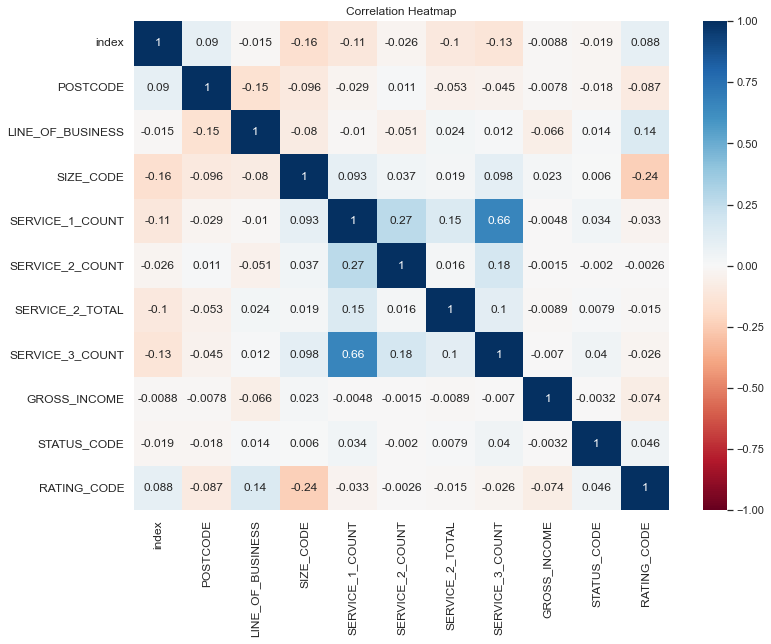

In [41]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_2.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

### One Hot Encoding

In [42]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# One-hot-encode the categorical columns.
enc_package_type = pd.DataFrame(encoder.fit_transform(df_2[df_2_categorical_fields]).toarray())

#merge one-hot encoded columns back with original DataFrame
df_2 = df_2.join(enc_package_type)

# data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)


#view final df
df_2

,index,POSTCODE,LINE_OF_BUSINESS,SIZE_CODE,PACKAGE_TYPE,PREVIOUS_PACKAGE_TYPE,SERVICE_1_COUNT,SERVICE_2_COUNT,SERVICE_2_TOTAL,SERVICE_3_COUNT,...,16,17,18,19,20,21,22,23,24,25
0,15,1037.00,70224.00,91406693.00,paid_tier_1,paid_tier_1,381.00,10.00,84.00,199.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,16,1016.00,18134.00,91406696.00,paid_tier_2,paid_tier_2,2350.00,348.00,877.00,2070.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
2,22,3780.00,70224.00,91406683.00,paid_tier_1,paid_tier_1,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
3,32,1111.00,70224.00,91406692.00,Freemium,S,178.00,7.00,50.00,347.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
4,36,5100.00,46904.00,91406683.00,paid_tier_1,paid_tier_1,371.00,0.00,165.00,570.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7863,27356,7030.00,47644.00,91406692.00,Free_tier_0,Free_tier_1,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
7864,27357,6000.00,49414.00,91406683.00,Free_tier_0,Free_tier_1,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
7865,27358,6000.00,49414.00,91406683.00,Free_tier_0,Free_tier_1,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
7866,27359,6000.00,49414.00,91406683.00,Free_tier_promo,Free_tier_1,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [43]:
df_2.drop(df_2_categorical_fields, axis=1, inplace=True)

In [44]:
df_2

,index,POSTCODE,LINE_OF_BUSINESS,SIZE_CODE,SERVICE_1_COUNT,SERVICE_2_COUNT,SERVICE_2_TOTAL,SERVICE_3_COUNT,GROSS_INCOME,STATUS_CODE,...,16,17,18,19,20,21,22,23,24,25
0,15,1037.00,70224.00,91406693.00,381.00,10.00,84.00,199.00,14147.00,91406700.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,16,1016.00,18134.00,91406696.00,2350.00,348.00,877.00,2070.00,122126.00,91406700.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
2,22,3780.00,70224.00,91406683.00,0.00,0.00,0.00,0.00,1260.00,91406700.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
3,32,1111.00,70224.00,91406692.00,178.00,7.00,50.00,347.00,1127.00,91406700.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
4,36,5100.00,46904.00,91406683.00,371.00,0.00,165.00,570.00,28900.00,91406700.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7863,27356,7030.00,47644.00,91406692.00,0.00,0.00,0.00,0.00,12545.00,91406700.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
7864,27357,6000.00,49414.00,91406683.00,0.00,0.00,0.00,0.00,0.00,91406700.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
7865,27358,6000.00,49414.00,91406683.00,0.00,0.00,0.00,0.00,0.00,91406700.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
7866,27359,6000.00,49414.00,91406683.00,0.00,0.00,0.00,0.00,0.00,91406700.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


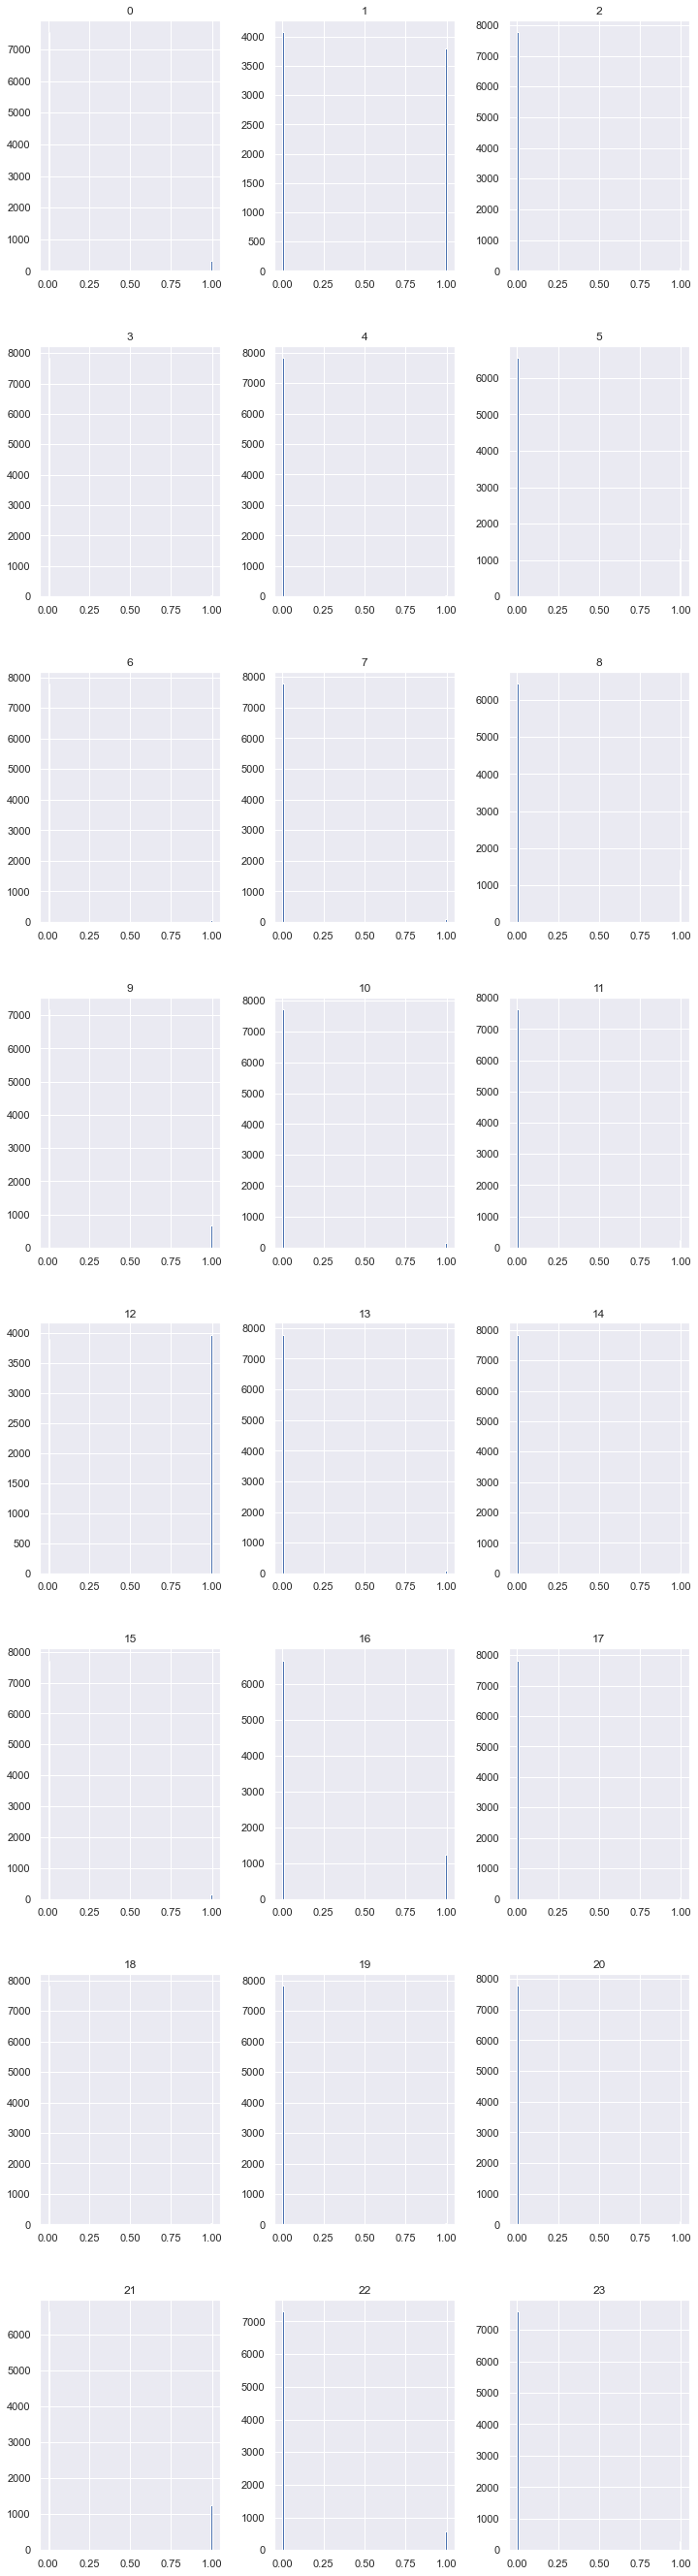

In [45]:
fig, axes = plt.subplots(len(enc_package_type.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        enc_package_type.hist(column = enc_package_type.columns[i], bins = 100, ax=axis)
        i = i+1

In [46]:
# (df_2.iloc[:,21]==1).sum()
# (df_2.iloc[:,21]==1).sum()
# (df_2.iloc[:,21]==1).sum()

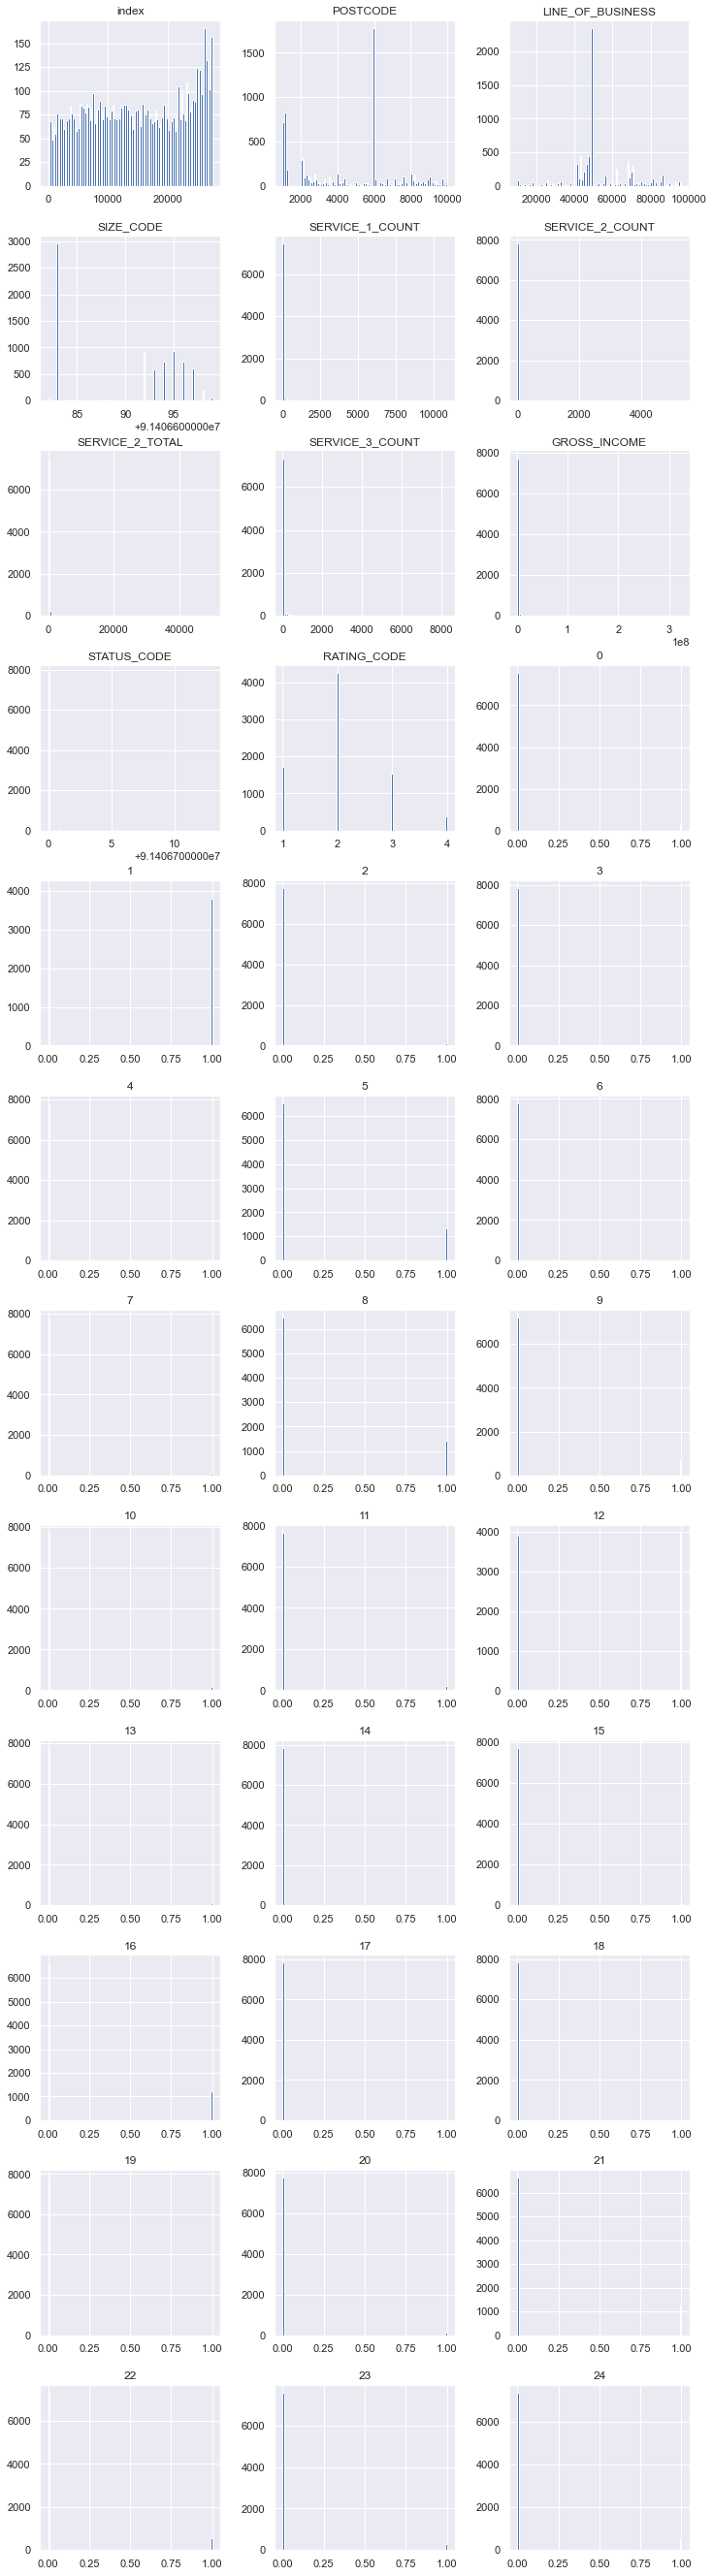

In [47]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_2_numerical_fts = df_2.select_dtypes(include=numerics).columns

fig, axes = plt.subplots(len(df_2[df_2_numerical_fts].columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df_2[df_2_numerical_fts].hist(column = df_2[df_2_numerical_fts].columns[i], bins = 100, ax=axis)
        i = i+1

In [48]:
df_2['GROSS_INCOME'].value_counts()

0.00         2677
2000.00         5
1.00            4
1634.00         4
15956.00        4
             ... 
101694.00       1
8324.00         1
542224.00       1
14979.00        1
12545.00        1
Name: GROSS_INCOME, Length: 5029, dtype: int64

### UFS : Unsupervised Feature Selection



In [49]:
df_2.count()
print(type(df_2))
df_2_np_arr = df_2.to_numpy()
df_2.keys()

<class 'pandas.core.frame.DataFrame'>


Index([           'index',         'POSTCODE', 'LINE_OF_BUSINESS',
              'SIZE_CODE',  'SERVICE_1_COUNT',  'SERVICE_2_COUNT',
        'SERVICE_2_TOTAL',  'SERVICE_3_COUNT',     'GROSS_INCOME',
            'STATUS_CODE',      'RATING_CODE',                  0,
                        1,                  2,                  3,
                        4,                  5,                  6,
                        7,                  8,                  9,
                       10,                 11,                 12,
                       13,                 14,                 15,
                       16,                 17,                 18,
                       19,                 20,                 21,
                       22,                 23,                 24,
                       25],
      dtype='object')

**Using MCFS (Multi Cluster Feature Selection)**

In [50]:
def fs_mcfs(X):
    # load data
    # Y

    # construct affinity matrix
    kwargs = {"metric": "euclidean", "neighborMode": "knn", "weightMode": "heatKernel", "k": 5, 't': 1}
    W = construct_W.construct_W(X, **kwargs)

    num_fea = 37    # specify the number of selected features
    num_cluster = 5    # specify the number of clusters, it is usually set as the number of classes in the ground truth

    # obtain the feature weight matrix
    Weight = MCFS.mcfs(X, n_selected_features=num_fea, W=W, n_clusters=num_cluster)
   
    
    # sort the feature scores in an ascending order according to the feature scores
    idx = MCFS.feature_ranking(Weight)
    return idx

#     # obtain the dataset on the selected features
#     selected_features = X[:, idx[0:num_fea]]

#     # perform kmeans clustering based on the selected features and repeats 20 times
#     nmi_total = 0
#     acc_total = 0
#     for i in range(0, 3):
#         nmi, acc = unsupervised_evaluation.evaluation(X_selected=selected_features, n_clusters=num_cluster, y=y)
#         nmi_total += nmi
#         acc_total += acc

#     # output the average NMI and average ACC
#     print ('NMI:', float(nmi_total)/20)
#     print ('ACC:', float(acc_total)/20)



In [51]:
ftrs_ranked = fs_mcfs(df_2_np_arr)

In [53]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_2_numerical_fts = df_2.select_dtypes(include=numerics).columns


**Using Laplacian Score**

In [59]:
def construct_W(X, neighbour_size = 5, t = 1):
    n_samples, n_features = np.shape(X)
    S=kneighbors_graph(X, neighbour_size+1, mode='distance',metric='euclidean') #sqecludian distance works only with mode=connectivity  results were absurd
    S = (-1*(S*S))/(2*t*t)
    S=S.tocsc()
    S=expm(S) # exponential
    S=S.tocsr()
    #[1]  M. Belkin and P. Niyogi, “Laplacian Eigenmaps and Spectral Techniques for Embedding and Clustering,” Advances in Neural Information Processing Systems,
    #Vol. 14, 2001. Following the paper to make the weights matrix symmetrix we use this method
    bigger = np.transpose(S) > S
    S = S - S.multiply(bigger) + np.transpose(S).multiply(bigger)
    return S


In [60]:
def LaplacianScore(X, neighbour_size = 5,  t = 1):
    W = construct_W(X,t=t,neighbour_size=neighbour_size)
    n_samples, n_features = np.shape(X)
    
    #construct the diagonal matrix
    D=np.array(W.sum(axis=1))
    D = scipy.sparse.diags(np.transpose(D), [0])
    #construct graph Laplacian L
    L=D-W.toarray()

    #construct 1= [1,···,1]' 
    I=np.ones((n_samples,n_features))

    #construct fr' => fr= [fr1,...,frn]'
    Xt = np.transpose(X)

    #construct fr^=fr-(frt D I/It D I)I
    t=np.matmul(np.matmul(Xt,D.toarray()),I)/np.matmul(np.matmul(np.transpose(I),D.toarray()),I)
    t=t[:,0]
    t=np.tile(t,(n_samples,1))
    fr=X-t

    #Compute Laplacian Score
    fr_t=np.transpose(fr)
    Lr=np.matmul(np.matmul(fr_t,L),fr)/np.matmul(np.dot(fr_t,D.toarray()),fr)

    return np.diag(Lr)

In [ ]:
from scipy.sparse.linalg import expm
ls =LaplacianScore(df_2_np_arr)

**Using Variance**

In [69]:
# from sklearn.feature_selection import VarianceThreshold
# def variance_threshold_selector(data, threshold=0.5):
#     selector = VarianceThreshold(threshold)
#     selector.fit(data)
#     return data[data.columns[selector.get_support(indices=True)]]

In [70]:
# df_3 = variance_threshold_selector(df_2[df_2_numerical_fts], 0.5)

# print(df_3.join(encoder_df))

In [71]:
ftrs_ranked

array([33, 28, 30, 22, 23, 31, 32, 10, 34, 25, 20, 35, 21, 14, 26,  3, 12,
        5,  6,  4,  0,  2,  1,  7,  8,  9, 36, 11, 13, 15, 16, 17, 19, 24,
       27, 29, 18], dtype=int64)

In [78]:
df_3 = df_2.iloc[:, ftrs_ranked[14:20]]
df_3.reset_index(drop=True, inplace=True)

In [79]:
df_3

,15,SIZE_CODE,1,SERVICE_2_COUNT,SERVICE_2_TOTAL,SERVICE_1_COUNT
0,0.00,91406693.00,0.00,10.00,84.00,381.00
1,0.00,91406696.00,0.00,348.00,877.00,2350.00
2,0.00,91406683.00,0.00,0.00,0.00,0.00
3,0.00,91406692.00,0.00,7.00,50.00,178.00
4,0.00,91406683.00,0.00,0.00,165.00,371.00
...,...,...,...,...,...,...
7863,0.00,91406692.00,0.00,0.00,0.00,0.00
7864,0.00,91406683.00,0.00,0.00,0.00,0.00
7865,0.00,91406683.00,0.00,0.00,0.00,0.00
7866,0.00,91406683.00,0.00,0.00,0.00,0.00


# Clustering

In [81]:
df_clstr = pd.DataFrame(StandardScaler().fit_transform(df_3))
print(df_clstr.shape)

# Kmeans
df_clstr_kmeans = df_clstr.copy()

# kmode
df_clstr_kmode = df_clstr.copy()

# Agglomerative Hierarchical Cluster (HCA)
df_clstr_HCA = df_clstr.copy()

(7868, 6)


## Clustering with KMeans

In [83]:
# pca = PCA(2)
# X_pca = pca.fit_transform(df_clstr)
# X_pca = pd.DataFrame(StandardScaler().fit_transform(X_pca))
# X_pca = X_pca.to_numpy()


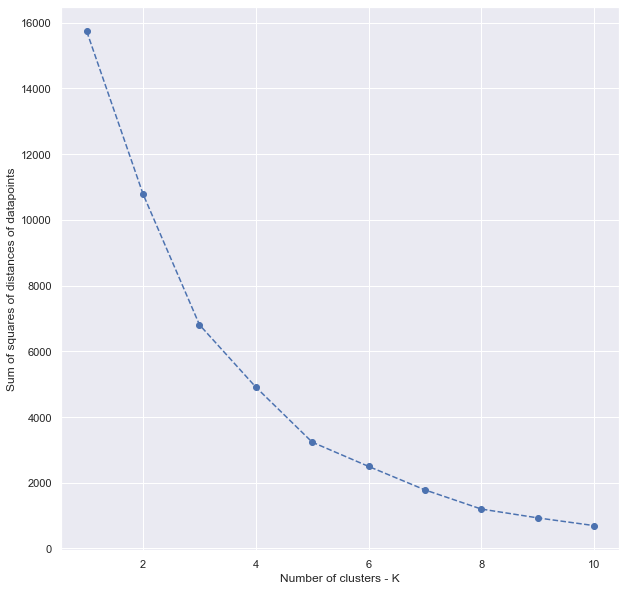

In [84]:
# ELBOW for the whole dataset without (PCA)
# =========================================
# WCSS: sum of squares of distances of datapoints
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i)
    model.fit(df_clstr_kmeans)
    wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss, 'bo--')
plt.xlabel('Number of clusters - K')
plt.ylabel('Sum of squares of distances of datapoints')
plt.show()


In [85]:
# # ploting the results (with PCA)
# # ===================

# # run once to avoid error in reconverting !!!!

# X_pca_df = pd.DataFrame({'Column1': X_pca[:, 0], 'Column2': X_pca[:, 1]})
# # print(type(X_pca_df))

# km_2 = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
# y_predict_km_pca = km_2.fit_predict(X_pca_df)

# centroids = km_2.cluster_centers_

# fig, ax = plt.subplots(figsize=(10,7))
# plt.scatter(X_pca_df["Column1"], X_pca_df["Column2"], c= y_predict_km_pca, s=50, alpha=0.5, cmap='viridis')
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

# ax.set_xlabel('Column1')
# ax.set_ylabel('Column2')
 

# plt.show()

## Clustering with Kmode

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14462.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 14462.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 14462.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 14462.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 14462.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1458, cost: 10669.0
Run 1, iteration: 2/100, moves: 0, cost: 10669.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 11263.0
Init: initializing cent

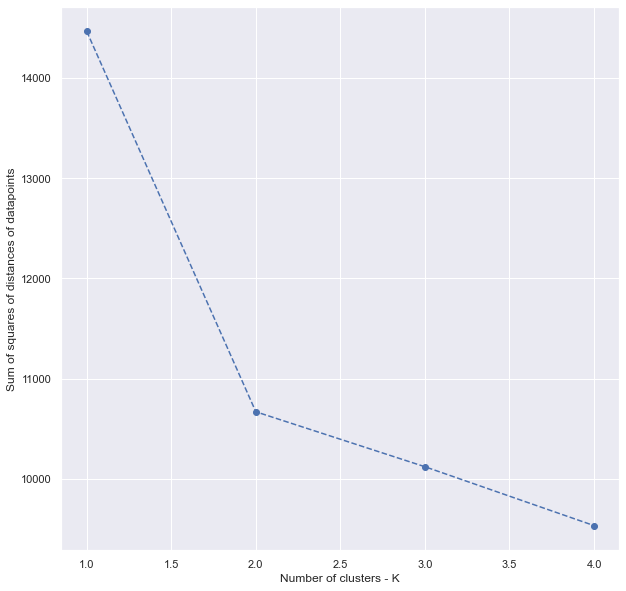

In [115]:
# ELBOW for Kmode
# ===============
# WCSS: sum of squares of distances of datapoints
wcss = []
for i in range(1,5):
    model = KModes(n_clusters=i, init='Huang', n_init=5, verbose=1)
    model.fit_predict(df_clstr_kmode)
    wcss.append(model.cost_)
plt.figure(figsize=(10,10))
plt.plot(range(1,5), wcss, 'bo--')
plt.xlabel('Number of clusters - K')
plt.ylabel('Sum of squares of distances of datapoints')
plt.show()


## Clustering with HCA

In [102]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(df_clstr_HCA)

AgglomerativeClustering(n_clusters=3)

### Dendogram

In [106]:
linkage_matrix = linkage(df_clstr_HCA, 'ward')

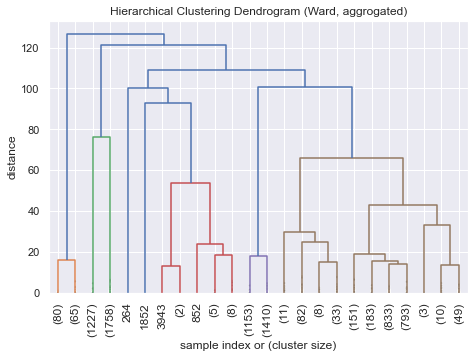

In [107]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()